*Eduardus Tjitrahardja | @edutjie | 2022*

# Clustering With K Means

## Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
plt.style.use("seaborn")

## Load Dataset

In [5]:
df = pd.read_csv("data/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Plotting Dataset

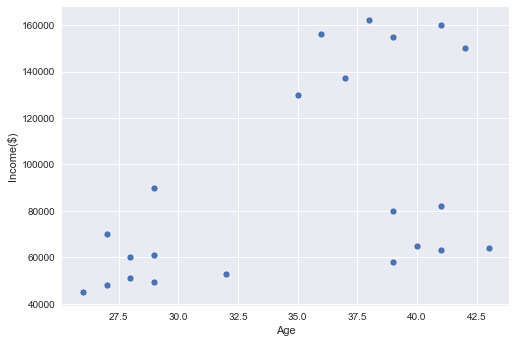

In [7]:
sns.scatterplot(x="Age", y="Income($)", data=df)
plt.show()

## Creating KMeans Model

In [11]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [12]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols

Index(['Age', 'Income($)'], dtype='object')

In [15]:
y_pred = km.fit_predict(df[num_cols])
y_pred

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [16]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


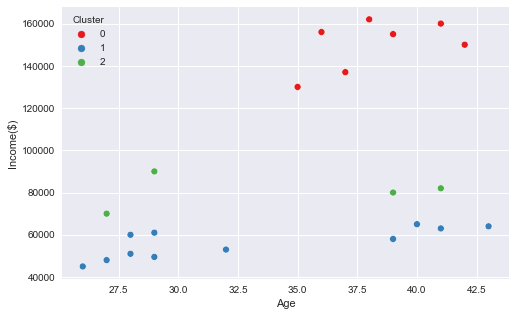

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Income($)", hue="Cluster", data=df, palette="Set1")
plt.show()

The clustering is not right because the data is not scaled the same way.

## Data Preprocessing

In [24]:
scaler = MinMaxScaler()

In [25]:
df_scaled = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols, index=df.index)
df_scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


## Clustering

In [26]:
y_pred = km.fit_predict(df_scaled)
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [27]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


In [42]:
# Centroids
print(km.cluster_centers_)

print("\nAfter Inverse Scaling:")
centroids = scaler.inverse_transform(km.cluster_centers_)
print(centroids)

[[0.85294118 0.2022792 ]
 [0.1372549  0.11633428]
 [0.72268908 0.8974359 ]]

After Inverse Scaling:
[[4.05000000e+01 6.86666667e+04]
 [2.83333333e+01 5.86111111e+04]
 [3.82857143e+01 1.50000000e+05]]


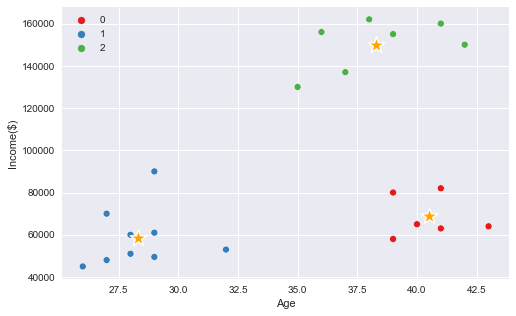

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="Income($)", hue="Cluster", data=df, palette="Set1")
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color="orange", s=300, marker="*")
plt.show()

## Elbow Method
Elbow is one of the most well-known methods by which you can select the correct value of k and boost your model performance.

In [44]:
k_range = range(1, 10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df_scaled)
    
    # Inertia: Sum of squared distances of samples to their closest cluster center (Squared Error)
    sse.append(km.inertia_) 
    
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22395807059250125,
 0.17840674931327935,
 0.13265419827245162,
 0.10188787724979426]

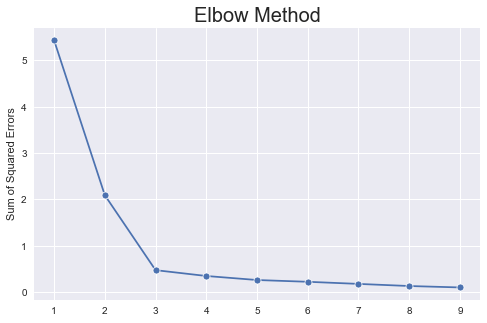

In [53]:
plt.figure(figsize=(8,5))
sns.lineplot(x=k_range, y=sse, marker="o")
plt.title("Elbow Method", size=20)
plt.ylabel("Sum of Squared Errors")
plt.show()

We can see that the best k is indeed 3.